In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.signal import find_peaks, peak_widths

from qutip import *


font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 16,
}

In [37]:
path = "20251204-2202-34_spectrum.dat"

# Load numeric data: ignores header lines starting with '#'
data = np.loadtxt(path, comments="#", delimiter="\t")

omega_all = data[:, 0]
A_all     = data[:, 1]
ds_all    = data[:, 2].astype(int)   # dataset id / step number

ds_ids = np.unique(ds_all)           # sorted unique dataset numbers

# Build per-dataset arrays
omega_list = []
A_list = []
for ds in ds_ids:
    mask = (ds_all == ds)
    omega_list.append(omega_all[mask])
    A_list.append(A_all[mask])

# If all datasets have the same number of points, stack into 2D arrays
lengths = np.array([len(x) for x in omega_list])
if np.all(lengths == lengths[0]):
    omega_2d = np.vstack(omega_list)   # shape: (n_datasets, n_points)
    A_2d     = np.vstack(A_list)
else:
    # Otherwise pad with NaNs to make rectangular arrays
    n_datasets = len(ds_ids)
    n_points_max = lengths.max()
    omega_2d = np.full((n_datasets, n_points_max), np.nan)
    A_2d     = np.full((n_datasets, n_points_max), np.nan)

    for i, (w, a) in enumerate(zip(omega_list, A_list)):
        omega_2d[i, :len(w)] = w
        A_2d[i, :len(a)]     = a

print("omega_2d shape:", omega_2d.shape)
print("A_2d shape:", A_2d.shape)
print("dataset ids:", ds_ids[:10], "...", ds_ids[-1])

omega_2d shape: (54, 400)
A_2d shape: (54, 400)
dataset ids: [0 1 2 3 4 5 6 7 8 9] ... 53


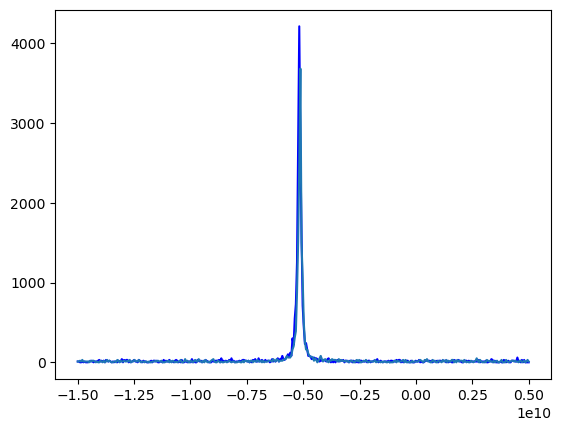

In [38]:
indx = 4
plt.plot(omega_2d[0,:], A_2d[0,:], color='blue')
plt.plot(omega_2d[indx,:], A_2d[indx,:])

In [39]:
path = "20251204_power_scan.csv"

# Load data (skips header automatically if present)
data = np.genfromtxt(path, delimiter=",", names=True)

# Extract columns into separate numpy arrays
f0        = data["f₀"]
A         = data["A"]
intensity = data["intensity"]

print(f0.shape, A.shape, intensity.shape)

(56,) (56,) (56,)


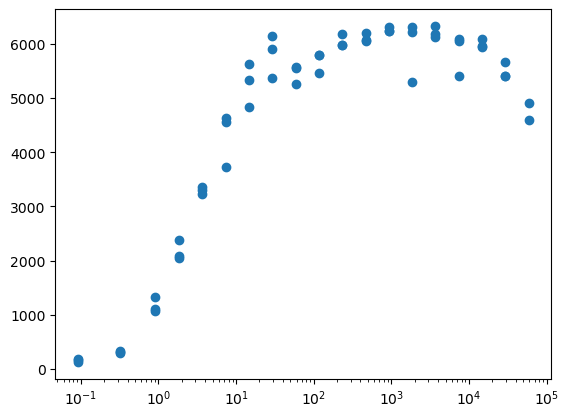

In [40]:
plt.plot(intensity, A, linestyle='none', marker='o')
plt.xscale('log')

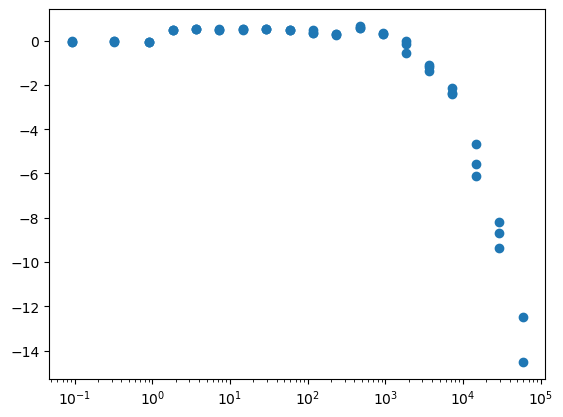

In [49]:
plt.plot(intensity, (f0-f0[0])*1e-9, linestyle='none', marker='o')
plt.xscale('log')


In [43]:
path = "20250415_power_scan.csv"

# Load data (skips header automatically if present)
data2 = np.genfromtxt(path, delimiter=",", names=True)

# Extract columns into separate numpy arrays
f2        = data2["f₀"]
A2         = data2["A"]
intensity2 = data2["intensity"]

print(f2.shape, A2.shape, intensity2.shape)

(49,) (49,) (49,)


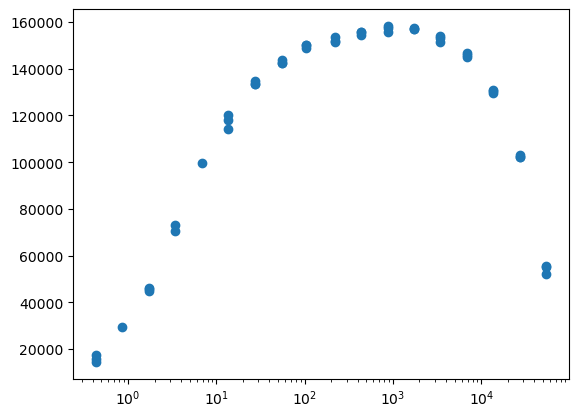

In [44]:
plt.plot(intensity2, A2, linestyle='none', marker='o')
plt.xscale('log')

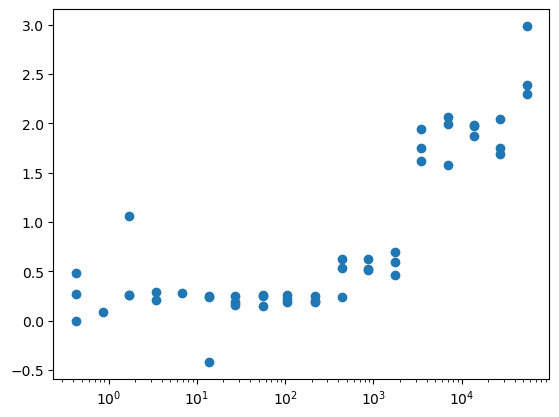

In [48]:
plt.plot(intensity2, (f2-f2[0])*1e-9, linestyle='none', marker='o')
plt.xscale('log')